<h1> Chintya Nermelita | Student Project_1 | Salary Analist Project <h1>

Reason: Objective: To determine the relationship between length of work experience and the amount of salary received.

## Data Processing 

In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#Import Data Salary_dataset from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Show Data Salary_dataset from drive
df=pd.read_csv('/content/drive/MyDrive/AGIT_Training/Colab_Notebooks/content/Salary_dataset.csv')
df.head()

,No,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [ ]:
#Check that data type
df.dtypes

No                   int64
YearsExperience    float64
Salary             float64
dtype: object

In [ ]:
#Show all columns
print("Column Names:" , df.columns)

Column Names: Index(['No', 'YearsExperience', 'Salary'], dtype='object')


In [ ]:
#Show index data
print("DataFrame Index: ", df.index)

DataFrame Index:  RangeIndex(start=0, stop=30, step=1)


In [ ]:
#Show describe data
df.describe()

,No,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


<Axes: >

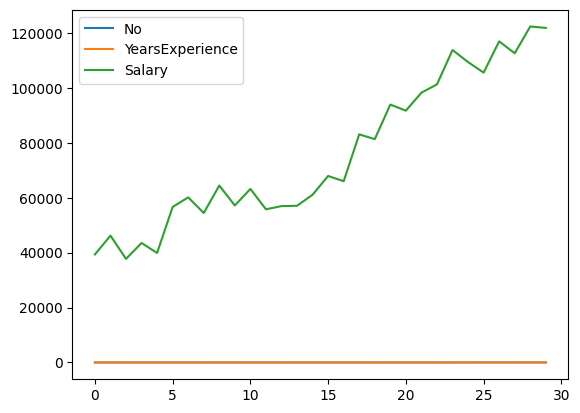

In [ ]:
#Show DF plot from data Salary_dataset
df.plot()

In [ ]:
# rm column 'No'
df = df.drop(['No'], axis=1)
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [ ]:
# Check data if there "Null"
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
# Check any duplicate from the data
df.duplicated().sum()

0

In [ ]:
# covariance: return co-variance
df.cov()

,YearsExperience,Salary
YearsExperience,8.053609,7.610630e+04
Salary,76106.303448,7.515510e+08


In [ ]:
#checking data correlation
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


##Ordinary Least Squares (OLS)

In [ ]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df.size

60

In [23]:
df.shape

(30, 2)

In [24]:
#Create OLS models
salary_ols =smf.ols(formula='Salary~YearsExperience',data=df).fit()

In [25]:
salary_ols.params

Intercept          24848.203967
YearsExperience     9449.962321
dtype: float64

In [26]:
salary_ols.rsquared

0.9569566641435086

In [27]:
salary_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           1.14e-20
Time:                        14:31:14   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.485e+04   2306.654     10.772      0.000    2.01e+04    2.96e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# Predicted salary based on work experience
salary_pred=salary_ols.predict(pd.DataFrame(df['YearsExperience']))
salary_pred

0      36188.158752
1      38078.151217
2      39968.143681
3      44693.124842
4      46583.117306
5      53198.090931
6      54143.087163
7      56033.079627
8      56033.079627
9      60758.060788
10     62648.053252
11     63593.049484
12     63593.049484
13     64538.045717
14     68318.030645
15     72098.015574
16     73988.008038
17     75878.000502
18     81547.977895
19     82492.974127
20     90052.943985
21     92887.932681
22    100447.902538
23    103282.891235
24    108007.872395
25    110842.861092
26    115567.842252
27    116512.838485
28    123127.812110
29    125017.804574
dtype: float64

In [29]:
# calculate RMSE dan RSE for salary_ols
df['salary_pred']=salary_pred

# RMSE
df['RSEd']=(df['Salary']-df['salary_pred'])**2
RSEd=df.sum()['RSEd']
RMSE=np.sqrt(RSEd/200)

# RSE
salary_pred_mean=np.mean(df['salary_pred'])
df['RSEp']=(salary_pred_mean-df['salary_pred'])**2
RSEp=df.sum()['RSEp']
RSE=RSEd/RSEp

salary_mean = np.mean(df['Salary'])
error=RMSE/salary_mean
# print value RSE,sales_mean,error
RMSE,RSE,error

(2165.7891767995657, 0.044979399244809, 0.028495726235455578)

In [30]:
# Using RMSE
from statsmodels.tools.eval_measures import rmse

# Calculate RMSE
rmse_val = rmse(df['Salary'], salary_pred)
rmse_val

5592.043608760659

Text(0.5, 1.0, 'Predicted Salary vs Years Experience OLS')

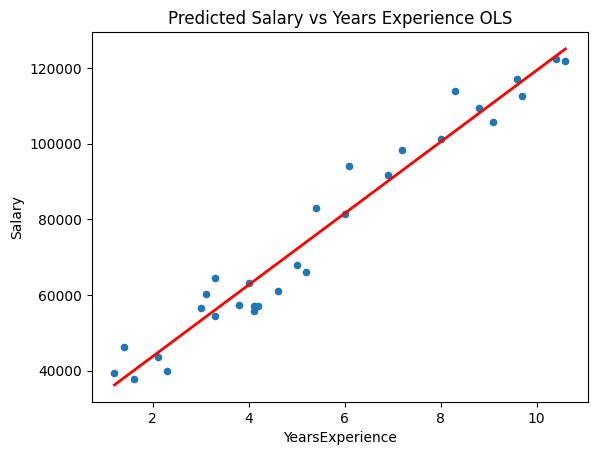

In [41]:
# Plot Salary Prediction vs YearsExperience 
df.plot(kind='scatter', x='YearsExperience', y='Salary')
plt.plot(pd.DataFrame(df['YearsExperience']),salary_pred,c='red',linewidth=2)
plt.title('Predicted Salary vs Years Experience OLS')

##Bayesian Regression

In [36]:
from sklearn import datasets, linear_model
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [37]:
regr_bayes = linear_model.BayesianRidge()
regr_bayes.get_params()

{'alpha_1': 1e-06,
 'alpha_2': 1e-06,
 'alpha_init': None,
 'compute_score': False,
 'copy_X': True,
 'fit_intercept': True,
 'lambda_1': 1e-06,
 'lambda_2': 1e-06,
 'lambda_init': None,
 'n_iter': 300,
 'tol': 0.001,
 'verbose': False}

RMSE: 5592.19


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.5, 1.0, 'Predicted Salary vs YearsExperience - Bayesian Regression')

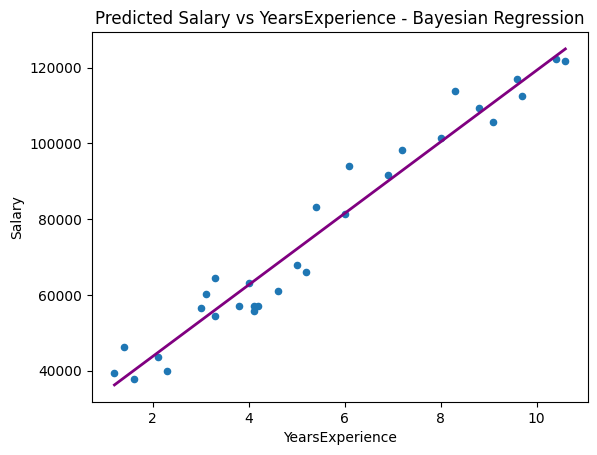

In [65]:
years = df['YearsExperience'].values.reshape(-1,1)
salary = df['Salary'].values.reshape(-1,1)

# Train model with training set
regr_bayes.fit(years, salary.ravel())

# prediction with data training
salary_pred2 = regr_bayes.predict(years)

# RMSE
print('RMSE: %.2f'
      % mean_squared_error(salary, salary_pred2, squared = False))

# Plot of Predicted Experience vs Salary
df.plot(kind='scatter', x='YearsExperience', y='Salary')
plt.plot(pd.DataFrame(df['YearsExperience']),salary_pred2,c='purple',linewidth=2)
plt.title('Predicted Salary vs YearsExperience - Bayesian Regression')

##Support Vector Machine (SVM) Regression

In [47]:
from sklearn import svm

In [58]:
# Create  object SVM regression
regr_svm1 = svm.LinearSVR(max_iter=100)
regr_svm1.get_params()

{'C': 1.0,
 'dual': True,
 'epsilon': 0.0,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'loss': 'epsilon_insensitive',
 'max_iter': 100,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

RMSE: 79636.99


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.5, 1.0, 'Predicted Salary vs YearsExperience - Bayesian Regression')

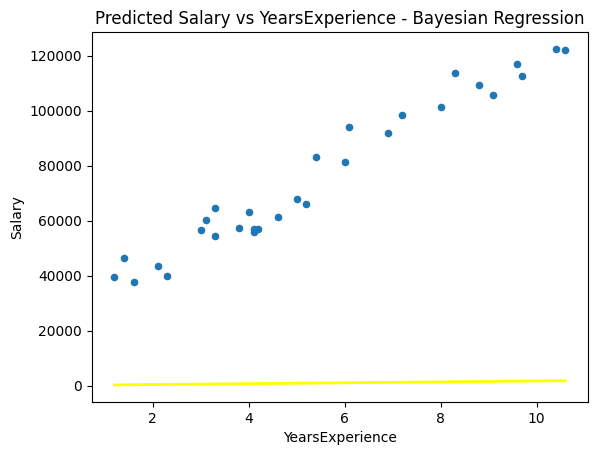

In [63]:
# Train model  with  training set
regr_svm1.fit (years, salary.ravel())

# cretae prediction with data testing
salary_prediction = regr_svm1.predict(years)

# RMSE
print('RMSE: %.2f' 
      % mean_squared_error(salary, salary_prediction, squared = False))

# Plot of predicted salary vs experience 
df.plot(kind='scatter', x='YearsExperience', y='Salary')
plt.plot(pd.DataFrame(df['YearsExperience']),salary_prediction,c='yellow',linewidth=2)
plt.title('Predicted Salary vs YearsExperience - Bayesian Regression')

In [64]:
y = 12
salary_predM = regr_svm1.predict([[y]])[0]
salary_predM

1978.7999999999997